In [ ]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

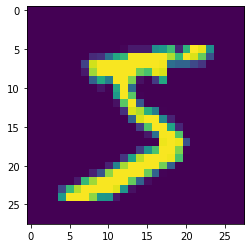

In [ ]:
plt.imshow(x_train[0])


In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.15, random_state = 42)

In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
y_validation_cat = to_categorical(y_validation, 10)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
x_validation = x_validation/255.0

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

In [ ]:
input_shape=(28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile( optimizer = 'adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
model.fit(x_train, y_train_cat, epochs = 8, batch_size = 128, validation_data = (x_validation, y_validation_cat), verbose = 1)


Epoch 1/8
399/399 [==============================] - 25s 61ms/step - loss: 0.4725 - accuracy: 0.8665 - val_loss: 0.0757 - val_accuracy: 0.9792
Epoch 2/8
399/399 [==============================] - 24s 59ms/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0558 - val_accuracy: 0.9829
Epoch 3/8
399/399 [==============================] - 24s 60ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0480 - val_accuracy: 0.9867
Epoch 4/8
399/399 [==============================] - 24s 60ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0427 - val_accuracy: 0.9887
Epoch 5/8
399/399 [==============================] - 24s 60ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0466 - val_accuracy: 0.9869
Epoch 6/8
399/399 [==============================] - 24s 60ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0400 - val_accuracy: 0.9896
Epoch 7/8
399/399 [==============================] - 24s 59ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.0401 - val_accuracy: 0.9896

In [ ]:
score = model.evaluate(x_test, y_test_cat, verbose = 1)
print('Accuracy: ', score[1])
print('Test loss: ', score[0])

313/313 [==============================] - 2s 6ms/step - loss: 0.0430 - accuracy: 0.9870
Accuracy:  0.9869999885559082
Test loss:  0.0430414117872715


In [ ]:
from keras.models import load_model
model.save('mnist_trained_1')

INFO:tensorflow:Assets written to: mnist_trained_1/assets


In [ ]:
from sklearn.metrics import classification_report
prediction = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
image_pred = model.predict(x_test[5].reshape(1,28,28,1))
image_pred

array([[8.3093958e-09, 9.9999416e-01, 8.7197076e-09, 6.8420811e-11,
        4.0341652e-07, 3.4136100e-10, 2.6218587e-09, 5.2349192e-06,
        1.2412441e-07, 2.6125635e-09]], dtype=float32)

In [ ]:
table = pd.DataFrame()
table['Numbers'] = np.arange(0,10)
table['Prob %'] = image_pred[0].round(2)*100

In [ ]:
table

,Numbers,Prob %
0,0,0.0
1,1,100.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0
